## Домашка 2
<h4><em>«Одно Кольцо, чтоб править всеми,<br>
Одно Кольцо, чтоб всех найти,<br>
Одно Кольцо, чтоб собрать всех в тени<br>
И заковать их всех во Тьме»</em><br>
— <em>Властелин колец</em>
</h4>

Эта домашка про приоритизацию метрик. За неё можно получить максимум 12 баллов. На решение отводится **14 календарных дней** с момента выдачи. Обратите внимание, что **дедлайны на курсе сразу жёсткие**, а значит отправка решений после них запрещена.
Задание выполняется самостоятельно, списывания не допускаются. При обнаружении одинаковых работ балл за задание анулируется у всех студентов, вне зависимости от того, кто у кого списал.

#### **Как сдать домашку?**
1. Скачайте этот ноутбук.
2. Решите задания (локально или в Google Colab). 
3. Опубликуйте решенный ноутбук в свой GitHub репозиторий (проверьте, чтобы он был публичным).
4. Приложите ссылку на решение в Яндекс-Форму для сдачи ДЗ (будет доступна на LMS Karpov Courses и в Телеграм-канале курса).

**Внимание**: Если вы работаете в Google Colab, также скачивайте .ipynb файл и публикуйте его в репозитории. Ссылки на Colab к сдаче не принимаются.

Все датасеты, с которыми предлагается работать в домашних заданиях, взяты из открытых источников или сгенерированы. Любые паттерны, найденные вне заданной канвы решения, являются случайными и не несут в себе смысла или инсайта.

[Данные](https://github.com/brezhnevaan/hse_product_metrics_course/releases/download/datasets_for_hw/hw_2_data.zip)

In [2]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

### Warm up

#### 1. Game dev — 2 балла
У вас есть данные о событиях в мобильной игре. Рассчитайте и визуализируйте:
- User Stickiness — отношение DAU к MAU (MAU рассчитывайте скользящим окном 30 дней для каждой даты только для полного окна)
- ARPDAU
- Paying Share — доля платящих пользователей
- Sessions per User — среднее число сессий на пользователя
- Daily Play Time — среднее время, проводимое пользователем в игре в день (рассчитываем как общее время в приложении)
- Avg Attempts per Session — среднее число попыток на сессию

*Смотрим на подневную динамику

In [3]:
df_game = pd.read_csv('hw_2_gamedev.csv', index_col=0)
df_game.head()

,session_id,user,date,revenue,attempts,session_length_sec
0,24590322,k0xevcHJ,2022-11-02,NaN,2.0,263
1,24590323,fMaLiagr,2022-11-02,NaN,10.0,953
2,24590324,0EXv0Q2V,2022-11-02,NaN,6.0,630
3,24590325,nY32SwuK,2022-11-02,NaN,9.0,1262
4,24590326,3KZkImTN,2022-11-02,NaN,16.0,2871


Описание данных (уникальный ключ session_id)

- session_id — уникальный идентификатор сессии
- user — уникальный идентификатор юзера
- date — дата 
- revenue — суммарная выручка на сессию
- attempts — число попыток на сессию
- session_length_sec — длина сессии в секундах

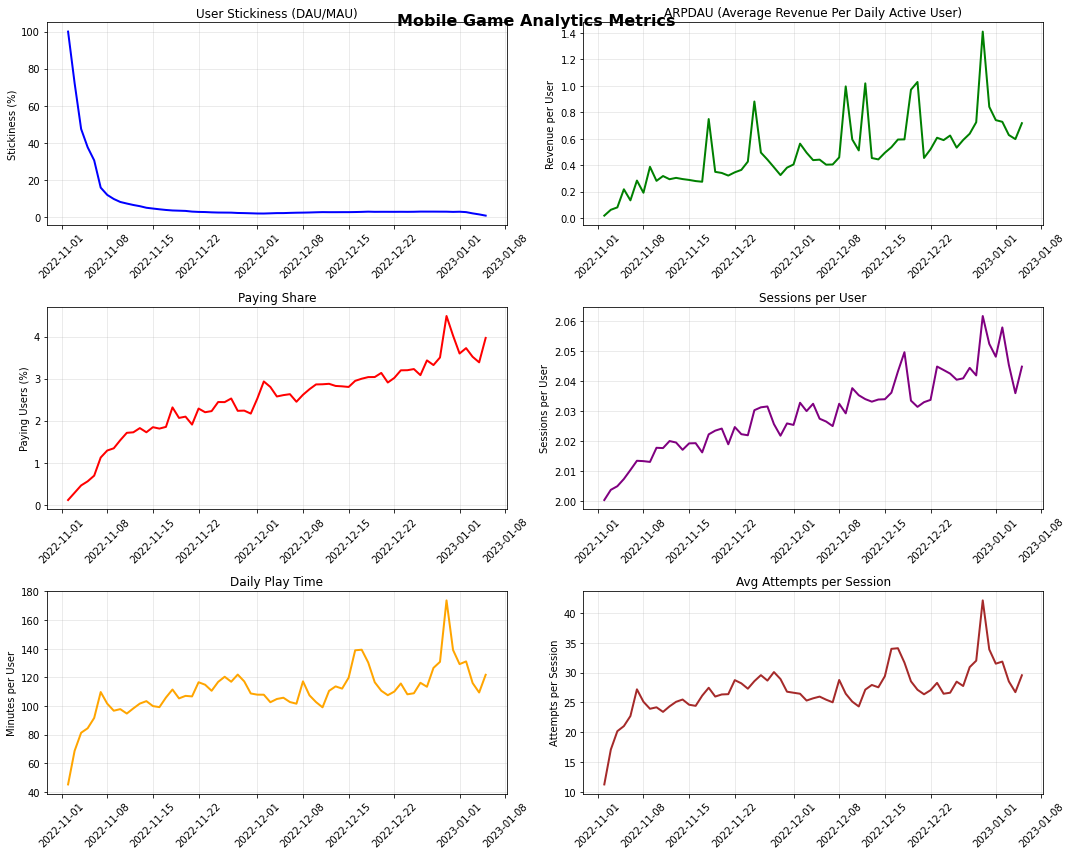

Средние значения метрик:
User Stickiness: 7.60%
ARPDAU: $0.4971
Paying Share: 2.47%
Sessions per User: 2.03
Daily Play Time: 110.23 минут
Avg Attempts per Session: 27.09


In [6]:
# your code is here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

# Загрузка данных
df_game = pd.read_csv('hw_2_gamedev.csv', index_col=0)

# Преобразование даты
df_game['date'] = pd.to_datetime(df_game['date'])

# 1. User Stickiness (DAU/MAU) с скользящим MAU
def calculate_stickiness(df):
    # DAU - Daily Active Users
    dau = df.groupby('date')['user'].nunique()
    
    # MAU - Monthly Active Users (скользящее окно 30 дней)
    mau = df.groupby('date')['user'].nunique().rolling('30D').sum()
    
    # User Stickiness
    stickiness = (dau / mau) * 100  # в процентах
    
    return stickiness

# 2. ARPDAU (Average Revenue Per Daily Active User)
def calculate_arpdau(df):
    daily_revenue = df.groupby('date')['revenue'].sum()
    dau = df.groupby('date')['user'].nunique()
    arpdau = daily_revenue / dau
    return arpdau.fillna(0)

# 3. Paying Share (доля платящих пользователей)
def calculate_paying_share(df):
    daily_paying_users = df[df['revenue'] > 0].groupby('date')['user'].nunique()
    daily_total_users = df.groupby('date')['user'].nunique()
    paying_share = (daily_paying_users / daily_total_users) * 100  # в процентах
    return paying_share.fillna(0)

# 4. Sessions per User
def calculate_sessions_per_user(df):
    daily_sessions = df.groupby('date')['session_id'].count()
    daily_users = df.groupby('date')['user'].nunique()
    sessions_per_user = daily_sessions / daily_users
    return sessions_per_user

# 5. Daily Play Time (среднее время в игре в день на пользователя)
def calculate_daily_playtime(df):
    daily_total_time = df.groupby('date')['session_length_sec'].sum()
    daily_users = df.groupby('date')['user'].nunique()
    daily_playtime = daily_total_time / daily_users / 60  # в минутах
    return daily_playtime

# 6. Avg Attempts per Session
def calculate_avg_attempts(df):
    daily_attempts = df.groupby('date')['attempts'].sum()
    daily_sessions = df.groupby('date')['session_id'].count()
    avg_attempts = daily_attempts / daily_sessions
    return avg_attempts

# Расчет всех метрик
stickiness = calculate_stickiness(df_game)
arpdau = calculate_arpdau(df_game)
paying_share = calculate_paying_share(df_game)
sessions_per_user = calculate_sessions_per_user(df_game)
daily_playtime = calculate_daily_playtime(df_game)
avg_attempts = calculate_avg_attempts(df_game)

# Визуализация
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Mobile Game Analytics Metrics', fontsize=16, fontweight='bold')

# 1. User Stickiness
axes[0, 0].plot(stickiness.index, stickiness.values, linewidth=2, color='blue')
axes[0, 0].set_title('User Stickiness (DAU/MAU)')
axes[0, 0].set_ylabel('Stickiness (%)')
axes[0, 0].grid(True, alpha=0.3)

# 2. ARPDAU
axes[0, 1].plot(arpdau.index, arpdau.values, linewidth=2, color='green')
axes[0, 1].set_title('ARPDAU (Average Revenue Per Daily Active User)')
axes[0, 1].set_ylabel('Revenue per User')
axes[0, 1].grid(True, alpha=0.3)

# 3. Paying Share
axes[1, 0].plot(paying_share.index, paying_share.values, linewidth=2, color='red')
axes[1, 0].set_title('Paying Share')
axes[1, 0].set_ylabel('Paying Users (%)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Sessions per User
axes[1, 1].plot(sessions_per_user.index, sessions_per_user.values, linewidth=2, color='purple')
axes[1, 1].set_title('Sessions per User')
axes[1, 1].set_ylabel('Sessions per User')
axes[1, 1].grid(True, alpha=0.3)

# 5. Daily Play Time
axes[2, 0].plot(daily_playtime.index, daily_playtime.values, linewidth=2, color='orange')
axes[2, 0].set_title('Daily Play Time')
axes[2, 0].set_ylabel('Minutes per User')
axes[2, 0].grid(True, alpha=0.3)

# 6. Avg Attempts per Session
axes[2, 1].plot(avg_attempts.index, avg_attempts.values, linewidth=2, color='brown')
axes[2, 1].set_title('Avg Attempts per Session')
axes[2, 1].set_ylabel('Attempts per Session')
axes[2, 1].grid(True, alpha=0.3)

# Форматирование дат на осях X
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Вывод средних значений
print("Средние значения метрик:")
print(f"User Stickiness: {stickiness.mean():.2f}%")
print(f"ARPDAU: ${arpdau.mean():.4f}")
print(f"Paying Share: {paying_share.mean():.2f}%")
print(f"Sessions per User: {sessions_per_user.mean():.2f}")
print(f"Daily Play Time: {daily_playtime.mean():.2f} минут")
print(f"Avg Attempts per Session: {avg_attempts.mean():.2f}")


#### 2. Ride hailing  — 2 балла
У вас есть данные из приложения такси. Рассчитайте и визуализируйте:
- Ride Completion Rate — CR из заказа в завершенную поездку
- Acceptance Rate — доля заказов, принятых водителем (считаем, что приняты все заказы, кроме заказов со статусом 'No Driver Found')
- Cancellation Rate — доля отмененных заказов
- Rides per Driver — среднее число поездок на водителя
- Avg Ride Check — средний чек поездки
- Отношение RTA к ETA (что измеряет эта метрика?)

*Смотрим на подневную динамику

In [7]:
df_rh = pd.read_csv('hw_2_taxi.csv')

In [8]:
df_rh.head()

,date,time,order_uid,order_status,passenger_id,vehicle_type,pickup_location,drop_location,ETA,RTA,...,reason_for_cancelling_by_customer,cancelled_rides_by_driver,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,fare,ride_distance,driver_ratings,customer_rating,payment_method
0,2024-01-01,00:19:34,2a11faf27f77eae8,Completed,CID8362794,Bike,Udyog Vihar,Ambience Mall,9.0,10.8,...,NaN,NaN,NaN,NaN,NaN,99.0,37.98,4.8,4.8,Cash
1,2024-01-01,01:35:18,33ed1f6bad78bdc8,Completed,CID8300238,Go Mini,Basai Dhankot,Madipur,6.0,8.5,...,NaN,NaN,NaN,NaN,NaN,114.0,39.29,4.2,4.1,Uber Wallet
2,2024-01-01,01:37:50,e2fc1fc520e93b85,Cancelled by Driver,CID2030746,Go Sedan,Tughlakabad,Greater Kailash,6.0,7.4,...,NaN,1.0,More than permitted people in there,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-01,01:48:03,a130fd507acf7804,Cancelled by Driver,CID3231181,Auto,Palam Vihar,Kherki Daula Toll,5.0,NaN,...,NaN,1.0,Personal & Car related issues,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-01,01:49:56,cae2db8689a422fa,Cancelled by Driver,CID3381661,Go Sedan,Narsinghpur,Pulbangash,3.0,6.2,...,NaN,1.0,More than permitted people in there,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Описание данных (уникальный ключ order_uid)

- date — дата создания заказа
- time — время создания заказа
- order_uid — уникальный идентификатор заказа
- order_status — статус заказа
- passenger_id — уникальный идентификатор пассажира
- vehicle_type — тип транспорта 
- pickup_location — место отправления
- drop_location — место назначения
- ETA — прогнозное время прибытия водителя на место отправления (estimated time of arrival)
- RTA — реальное время прибытия водителя на место отправления (real time of arrival)
- driver_id — уникальный идентификатор водителя
- cancelled_rides_by_customer — флаг отмены поездки пассажиром
- reason_for_cancelling_by_customer — причина отмены поездки пассажиром
- cancelled_rides_by_driver — флаг отмены поездки водителем
- driver_cancellation_reason — причина отмены поездки водителем
- incomplete_rides — флаг незавершенной поездки
- incomplete_rides_reason — причина незавершенной поездки
- fare — цена поездки
- ride_distance – расстояние поездки
- driver_ratings — рейтинг водителя
- customer_rating — рейтинг пассажира
- payment_method – способ оплаты

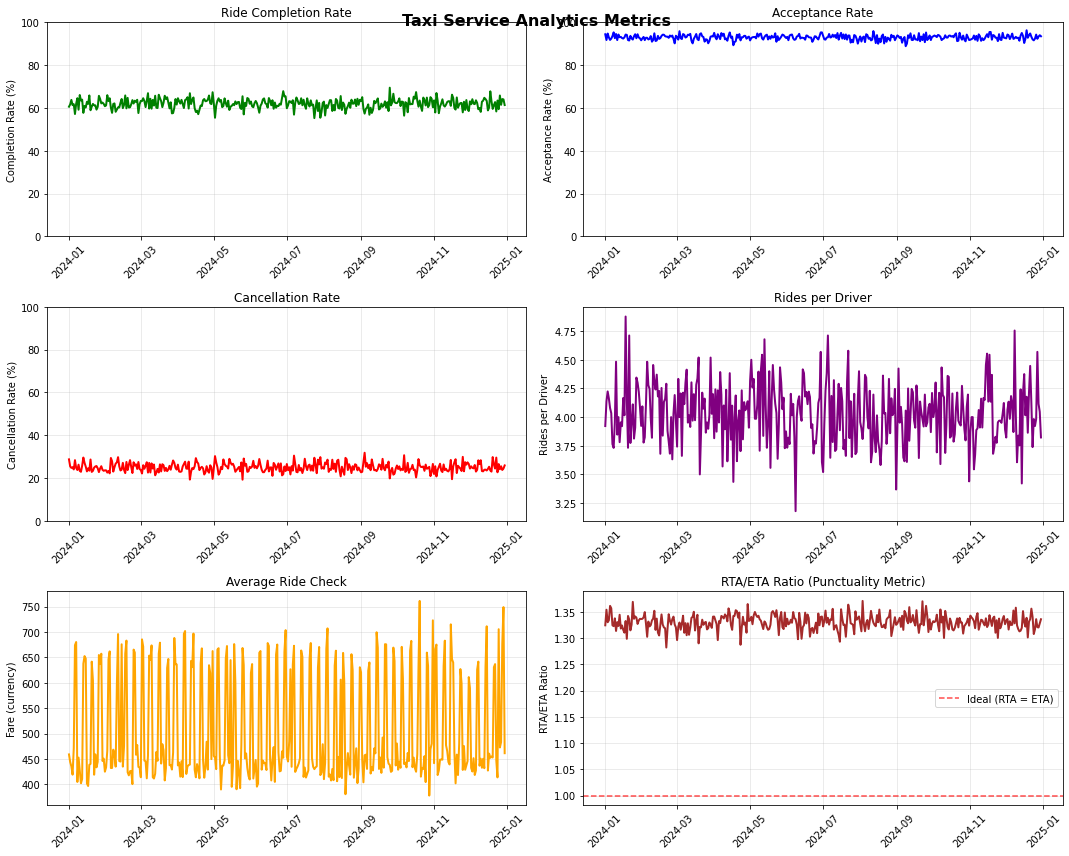

Средние значения метрик:
Ride Completion Rate: 62.00%
Acceptance Rate: 93.00%
Cancellation Rate: 25.00%
Rides per Driver: 4.03
Avg Ride Check: 507.49
RTA/ETA Ratio: 1.33


In [10]:
# your code is here

# Преобразование даты и времени
df_rh['datetime'] = pd.to_datetime(df_rh['date'] + ' ' + df_rh['time'])
df_rh['date'] = pd.to_datetime(df_rh['date'])

# 1. Ride Completion Rate - доля завершенных поездок
def calculate_completion_rate(df):
    daily_orders = df.groupby('date')['order_uid'].count()
    daily_completed = df[df['order_status'] == 'Completed'].groupby('date')['order_uid'].count()
    completion_rate = (daily_completed / daily_orders) * 100
    return completion_rate.fillna(0)

# 2. Acceptance Rate - доля принятых заказов
def calculate_acceptance_rate(df):
    daily_orders = df.groupby('date')['order_uid'].count()
    daily_accepted = df[df['order_status'] != 'No Driver Found'].groupby('date')['order_uid'].count()
    acceptance_rate = (daily_accepted / daily_orders) * 100
    return acceptance_rate.fillna(0)

# 3. Cancellation Rate - доля отмененных заказов
def calculate_cancellation_rate(df):
    daily_orders = df.groupby('date')['order_uid'].count()
    daily_cancelled = df[df['order_status'].str.contains('Cancelled', na=False)].groupby('date')['order_uid'].count()
    cancellation_rate = (daily_cancelled / daily_orders) * 100
    return cancellation_rate.fillna(0)

# 4. Rides per Driver - среднее число поездок на водителя
def calculate_rides_per_driver(df):
    # Считаем только завершенные поездки с известными водителями
    completed_rides = df[(df['order_status'] == 'Completed') & (df['driver_id'].notna())]
    daily_rides = completed_rides.groupby('date')['order_uid'].count()
    daily_drivers = completed_rides.groupby('date')['driver_id'].nunique()
    rides_per_driver = daily_rides / daily_drivers
    return rides_per_driver.fillna(0)

# 5. Avg Ride Check - средний чек поездки
def calculate_avg_ride_check(df):
    completed_rides = df[df['order_status'] == 'Completed']
    daily_revenue = completed_rides.groupby('date')['fare'].sum()
    daily_rides = completed_rides.groupby('date')['order_uid'].count()
    avg_ride_check = daily_revenue / daily_rides
    return avg_ride_check.fillna(0)

# 6. RTA/ETA Ratio - отношение реального времени к预估 времени
def calculate_rta_eta_ratio(df):
    # Берем только записи с обоими значениями
    valid_rides = df[(df['ETA'].notna()) & (df['RTA'].notna()) & (df['ETA'] > 0)]
    daily_rta_eta_ratio = valid_rides.groupby('date').apply(lambda x: (x['RTA'] / x['ETA']).mean())
    return daily_rta_eta_ratio

# Расчет всех метрик
completion_rate = calculate_completion_rate(df_rh)
acceptance_rate = calculate_acceptance_rate(df_rh)
cancellation_rate = calculate_cancellation_rate(df_rh)
rides_per_driver = calculate_rides_per_driver(df_rh)
avg_ride_check = calculate_avg_ride_check(df_rh)
rta_eta_ratio = calculate_rta_eta_ratio(df_rh)

# Визуализация
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Taxi Service Analytics Metrics', fontsize=16, fontweight='bold')

# 1. Ride Completion Rate
axes[0, 0].plot(completion_rate.index, completion_rate.values, linewidth=2, color='green')
axes[0, 0].set_title('Ride Completion Rate')
axes[0, 0].set_ylabel('Completion Rate (%)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_ylim(0, 100)

# 2. Acceptance Rate
axes[0, 1].plot(acceptance_rate.index, acceptance_rate.values, linewidth=2, color='blue')
axes[0, 1].set_title('Acceptance Rate')
axes[0, 1].set_ylabel('Acceptance Rate (%)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_ylim(0, 100)

# 3. Cancellation Rate
axes[1, 0].plot(cancellation_rate.index, cancellation_rate.values, linewidth=2, color='red')
axes[1, 0].set_title('Cancellation Rate')
axes[1, 0].set_ylabel('Cancellation Rate (%)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_ylim(0, 100)

# 4. Rides per Driver
axes[1, 1].plot(rides_per_driver.index, rides_per_driver.values, linewidth=2, color='purple')
axes[1, 1].set_title('Rides per Driver')
axes[1, 1].set_ylabel('Rides per Driver')
axes[1, 1].grid(True, alpha=0.3)

# 5. Avg Ride Check
axes[2, 0].plot(avg_ride_check.index, avg_ride_check.values, linewidth=2, color='orange')
axes[2, 0].set_title('Average Ride Check')
axes[2, 0].set_ylabel('Fare (currency)')
axes[2, 0].grid(True, alpha=0.3)

# 6. RTA/ETA Ratio
axes[2, 1].plot(rta_eta_ratio.index, rta_eta_ratio.values, linewidth=2, color='brown')
axes[2, 1].set_title('RTA/ETA Ratio (Punctuality Metric)')
axes[2, 1].set_ylabel('RTA/ETA Ratio')
axes[2, 1].axhline(y=1, color='red', linestyle='--', alpha=0.7, label='Ideal (RTA = ETA)')
axes[2, 1].grid(True, alpha=0.3)
axes[2, 1].legend()


for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Вывод средних значений
print("Средние значения метрик:")
print(f"Ride Completion Rate: {completion_rate.mean():.2f}%")
print(f"Acceptance Rate: {acceptance_rate.mean():.2f}%")
print(f"Cancellation Rate: {cancellation_rate.mean():.2f}%")
print(f"Rides per Driver: {rides_per_driver.mean():.2f}")
print(f"Avg Ride Check: {avg_ride_check.mean():.2f}")
print(f"RTA/ETA Ratio: {rta_eta_ratio.mean():.2f}")

RTA/ETA Ratio - это метрика пунктуальности сервиса:

RTA (Real Time of Arrival) - реальное время прибытия водителя

ETA (Estimated Time of Arrival) -приблизительно время прибытия
Интерпретация:

Ratio = 1: Водитель прибыл точно вовремя (идеал)

Ratio < 1: Водитель прибыл раньше ожидаемого (отлично)

Ratio > 1: Водитель прибыл позже ожидаемого (проблема)

### Case Study. Запуск подкастов в стриминговом сервисе 🎧

**Легенда**  
Вы работаете продуктовым аналитиком в музыкальном стриминговом сервисе. Недавно в продукте запустился раздел с подкастами. Команда, отвечающая за запуск, хочет понять, стоит ли масштабировать и продвигать этот формат.

In [3]:
df_music_logs = pd.read_parquet('hw_2_streaming_logs.pqt')
df_music_subs = pd.read_parquet('hw_2_streaming_subs.pqt')

In [4]:
df_music_logs.head()

,datetime,uid,item_id,played_ratio_pct,track_length_seconds,content_type,is_first_date
0,2024-01-13 10:00:00,468300,7400764,100,225,music,0.0
1,2024-01-13 10:00:05,347600,3415205,100,250,music,0.0
2,2024-01-13 10:00:10,942900,6728180,1,270,music,0.0
3,2024-01-13 10:00:15,243500,5283544,100,195,music,0.0
4,2024-01-13 10:00:15,12700,8932363,100,245,music,0.0


In [5]:
df_music_subs.head()

,uid,start_date,end_date
0,600,2024-08-08,NaT
1,700,2024-03-29,NaT
2,800,2024-06-13,NaT
3,1100,2024-11-19,NaT
4,1400,2024-12-01,NaT


Описание данных hw_2_streaming_logs:

- datetime — дата-время взаимодействия с контентом
- uid — уникальный идентификатор пользователя
- item_id — уникальный идентификатор трека/эпизода
- played_ratio_pct — процент от длительности, который был воспроизведен
- track_length_seconds – длина трека/эпизода в секундах
- content_type — тип контента: музыка или подкаст
- is_first_date — флаг, является ли эта дата первой для пользователя в продукте

Описание данных hw_2_streaming_subs:

- uid — уникальный идентификатор пользователя
- start_date — дата начала подписки
- end_date — дата окончания подписки

#### 3. Метрики роста  — 2 балла

Рассчитайте и визуализируйте:
- DAU, MAU, WAU;
- Количество новых премиум-подписчиков (за неделю и месяц);
- Проникновение подкастов — долю юзеров, послушавших подкаст хотя бы раз (за неделю и месяц).

Сделайте выводы:
- Есть ли выраженный тренд?
- Нет ли подозрений, что с раскаткой раздела что-то могло пойти не так (изменение тренда, выраженные ступеньки)?
- Как выглядит адопшен? Можно ли предположить наличие каких-то эффектов в пользовательском взаимодействии с новым разделом?

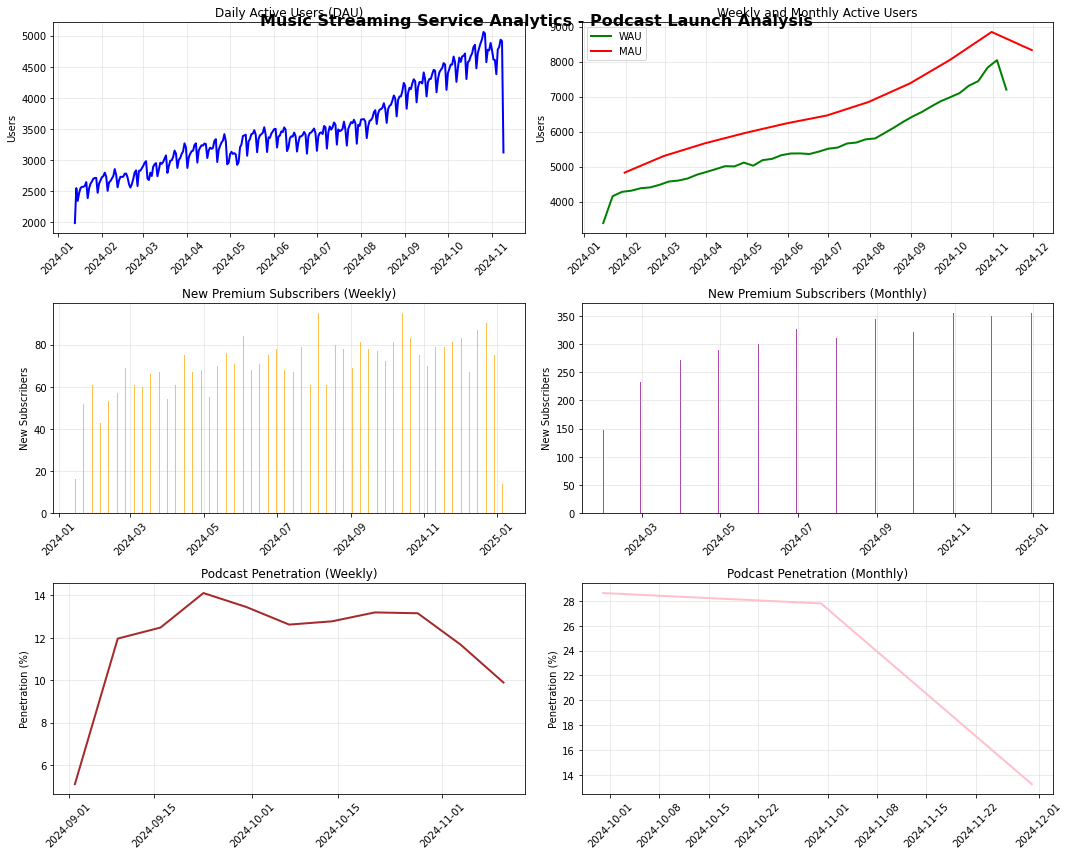

In [16]:
# your code is here


# Преобразование дат
df_music_logs['datetime'] = pd.to_datetime(df_music_logs['datetime'])
df_music_logs['date'] = df_music_logs['datetime'].dt.date
df_music_subs['start_date'] = pd.to_datetime(df_music_subs['start_date'])

# 1. Метрики роста: DAU, WAU, MAU
def calculate_growth_metrics(df):
    df_daily = df.groupby('date')['uid'].nunique().reset_index()
    df_daily.columns = ['date', 'DAU']
    
    # WAU - Weekly Active Users
    wau = df.groupby(pd.Grouper(key='datetime', freq='W-MON'))['uid'].nunique()
    
    # MAU - Monthly Active Users
    mau = df.groupby(pd.Grouper(key='datetime', freq='M'))['uid'].nunique()
    
    return df_daily, wau, mau

# 2. Новые премиум-подписчики
def calculate_new_subscribers(df_subs, df_logs):
    # Находим первую дату активности каждого пользователя
    first_activity = df_logs.groupby('uid')['datetime'].min().reset_index()
    first_activity.columns = ['uid', 'first_activity_date']
    
    # Объединяем с подписками
    subs_with_activity = df_subs.merge(first_activity, on='uid')
    
    # Новые подписчики за неделю
    weekly_new_subs = subs_with_activity.groupby(
        pd.Grouper(key='start_date', freq='W-MON')
    )['uid'].count()
    
    # Новые подписчики за месяц
    monthly_new_subs = subs_with_activity.groupby(
        pd.Grouper(key='start_date', freq='M')
    )['uid'].count()
    
    return weekly_new_subs, monthly_new_subs

# 3. Проникновение подкастов
def calculate_podcast_penetration(df):
    # Пользователи, слушавшие подкасты
    podcast_users = df[df['content_type'] == 'podcast'].groupby('date')['uid'].nunique()
    
    # Все активные пользователи
    all_users = df.groupby('date')['uid'].nunique()
    
    # Доля за неделю
    weekly_penetration = df[df['content_type'] == 'podcast'].groupby(
        pd.Grouper(key='datetime', freq='W-MON')
    )['uid'].nunique() / df.groupby(
        pd.Grouper(key='datetime', freq='W-MON')
    )['uid'].nunique() * 100
    
    # Доля за месяц
    monthly_penetration = df[df['content_type'] == 'podcast'].groupby(
        pd.Grouper(key='datetime', freq='M')
    )['uid'].nunique() / df.groupby(
        pd.Grouper(key='datetime', freq='M')
    )['uid'].nunique() * 100
    
    return podcast_users, all_users, weekly_penetration, monthly_penetration

# Расчет всех метрик
dau_data, wau, mau = calculate_growth_metrics(df_music_logs)
weekly_new_subs, monthly_new_subs = calculate_new_subscribers(df_music_subs, df_music_logs)
podcast_users, all_users, weekly_penetration, monthly_penetration = calculate_podcast_penetration(df_music_logs)

# Визуализация
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Music Streaming Service Analytics - Podcast Launch Analysis', fontsize=16, fontweight='bold')

# 1. DAU
axes[0, 0].plot(dau_data['date'], dau_data['DAU'], linewidth=2, color='blue')
axes[0, 0].set_title('Daily Active Users (DAU)')
axes[0, 0].set_ylabel('Users')
axes[0, 0].grid(True, alpha=0.3)

# 2. WAU и MAU
axes[0, 1].plot(wau.index, wau.values, linewidth=2, color='green', label='WAU')
axes[0, 1].plot(mau.index, mau.values, linewidth=2, color='red', label='MAU')
axes[0, 1].set_title('Weekly and Monthly Active Users')
axes[0, 1].set_ylabel('Users')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Новые подписчики (неделя)
axes[1, 0].bar(weekly_new_subs.index, weekly_new_subs.values, alpha=0.7, color='orange')
axes[1, 0].set_title('New Premium Subscribers (Weekly)')
axes[1, 0].set_ylabel('New Subscribers')
axes[1, 0].grid(True, alpha=0.3)

# 4. Новые подписчики (месяц)
axes[1, 1].bar(monthly_new_subs.index, monthly_new_subs.values, alpha=0.7, color='purple')
axes[1, 1].set_title('New Premium Subscribers (Monthly)')
axes[1, 1].set_ylabel('New Subscribers')
axes[1, 1].grid(True, alpha=0.3)

# 5. Проникновение подкастов (неделя)
axes[2, 0].plot(weekly_penetration.index, weekly_penetration.values, linewidth=2, color='brown')
axes[2, 0].set_title('Podcast Penetration (Weekly)')
axes[2, 0].set_ylabel('Penetration (%)')
axes[2, 0].grid(True, alpha=0.3)

# 6. Проникновение подкастов (месяц)
axes[2, 1].plot(monthly_penetration.index, monthly_penetration.values, linewidth=2, color='pink')
axes[2, 1].set_title('Podcast Penetration (Monthly)')
axes[2, 1].set_ylabel('Penetration (%)')
axes[2, 1].grid(True, alpha=0.3)

# Форматирование
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Дополнительный анализ поведения пользователей подкастов
def analyze_podcast_behavior(df):
    # Сравнение глубины прослушивания
    music_play_ratio = df[df['content_type'] == 'music']['played_ratio_pct'].mean()
    podcast_play_ratio = df[df['content_type'] == 'podcast']['played_ratio_pct'].mean()
    
    # Сравнение длины контента
    music_length = df[df['content_type'] == 'music']['track_length_seconds'].mean()
    podcast_length = df[df['content_type'] == 'podcast']['track_length_seconds'].mean()
    
    # Активность пользователей подкастов
    podcast_user_engagement = df[df['content_type'] == 'podcast'].groupby('uid').agg({
        'item_id': 'count',
        'played_ratio_pct': 'mean',
        'track_length_seconds': 'mean'
    }).mean()
    
    return music_play_ratio, podcast_play_ratio, music_length, podcast_length, podcast_user_engagement


DAU,WAU, MAU растет, значительных аномалий не обнаружено
Тренд проникновения подкастов падает
РЕКОМЕНДАЦИЯ: Доработать перед масштабированием
   - Проанализировать причины низкого вовлечения
   - Улучшить рекомендации подкастов
   - Провести A/B тесты интерфейса

#### 4. Метрики продукта (шаг 1)  — 2 балла

Рассчитайте и визуализируйте как для всех пользователей в совокупности, так и для сегментов пользователей в разрезе — сделали / не сделали взаимодействие с подкастами (грубо говоря разделяем юзеров на тех, кто слушает только музыку и тех, кто слушает еще и подкасты):
1. Среднее время прослушивания на пользователя.
2. Среднее число треков/эпизодов на пользователя (среднее число item_id). Посчитайте метрику, как от уникальных, так и от не уникальных item_id. Подумайте, что показывает каждая из них?
3. Долю премиум-подписчиков. Обратите внимание, что нам нужна активная подписка, если пользователь отписался в том же периоде, что подписался, мы больше не считаем подписку активной.

Рассчитайте и визуализируйте как по всем item_id, так и в разрезе типов контента:
- Долю дослушанных треков/эпизодов до конца. Обратите внимание, данная метрика уже не пользовательская.

Периоды — неделя и месяц. Неполные периоды нужно обрезать, если они мешают чтению графиков.   
Признак взаимодействия присвайвайте только для периода, когда оно действительно было.   
Для месячной динамики метрик по признаку взаимодействия с подкастами у вас получится всего 2 точки, такая визуализая тоже полезна, она сглаживает недельные колебания и помогает оценивать тренд в масштабе года.

Сделайте выводы:
- Есть ли выраженный тренд?
- Изменилась ли метрика после запуска подкастов?
- Отличается ли метрика сегмента, взаимодействовавшего с подкастами, от тех, кто слушал только музыку? (будьте аккуратны с выводами в этом пункте, мы не проверяем изменение на каузальность, поэтому не можем быть уверены где причина, а где следствие)
- Есть ли отличия между типами контента?

*За взаимодействие с подкастами давайте считать только прослушивание >= 30% или более 2х минут контента*

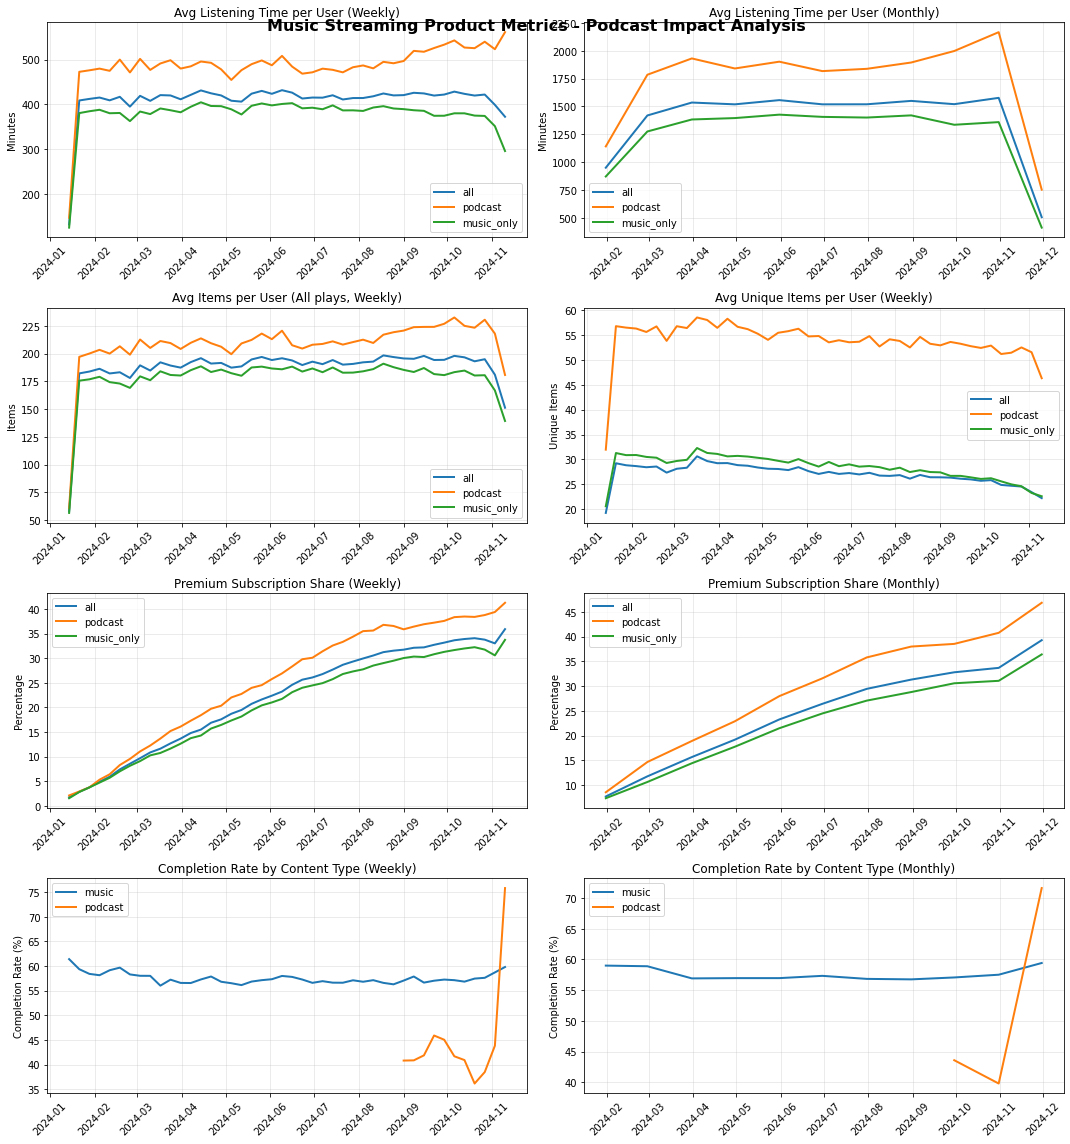

In [9]:
# Преобразование дат
df_music_logs['datetime'] = pd.to_datetime(df_music_logs['datetime'])
df_music_logs['date'] = df_music_logs['datetime'].dt.date
df_music_subs['start_date'] = pd.to_datetime(df_music_subs['start_date'])
df_music_subs['end_date'] = pd.to_datetime(df_music_subs['end_date'])

# Добавляем столбец played_seconds в основной DataFrame
df_music_logs['played_seconds'] = (df_music_logs['played_ratio_pct'] / 100) * df_music_logs['track_length_seconds']

# Определяем пользователей подкастов (прослушали >=30% или >2 минут)
def identify_podcast_users(df):
    # Фильтруем подкасты с meaningful interaction
    podcast_interaction = df[
        (df['content_type'] == 'podcast') & 
        ((df['played_ratio_pct'] >= 30) | (df['played_seconds'] >= 120))
    ]
    
    # Находим пользователей с взаимодействием с подкастами
    podcast_users = podcast_interaction['uid'].unique()
    
    return podcast_users

podcast_users_set = set(identify_podcast_users(df_music_logs))

# Функция для расчета метрик по сегментам
def calculate_segment_metrics(df, period='W'):
    metrics = []
    
    for date_group, group_data in df.groupby(pd.Grouper(key='datetime', freq=period)):
        if len(group_data) == 0:
            continue
            
        # Сегментируем пользователей
        unique_users = group_data['uid'].unique()
        podcast_users = [uid for uid in unique_users if uid in podcast_users_set]
        music_only_users = [uid for uid in unique_users if uid not in podcast_users_set]
        
        # Метрики для всех пользователей
        total_listening_time = group_data['played_seconds'].sum()
        total_users = len(unique_users)
        avg_listening_time = total_listening_time / total_users if total_users > 0 else 0
        
        total_items = len(group_data)
        total_unique_items = group_data['item_id'].nunique()
        avg_items_per_user = total_items / total_users if total_users > 0 else 0
        avg_unique_items_per_user = total_unique_items / total_users if total_users > 0 else 0
        
        # Метрики по сегментам
        for segment_name, segment_users in [('all', unique_users), 
                                          ('podcast', podcast_users), 
                                          ('music_only', music_only_users)]:
            
            if len(segment_users) == 0:
                continue
                
            segment_data = group_data[group_data['uid'].isin(segment_users)]
            
            segment_listening_time = segment_data['played_seconds'].sum()
            segment_avg_listening_time = segment_listening_time / len(segment_users)
            
            segment_items = len(segment_data)
            segment_unique_items = segment_data['item_id'].nunique()
            segment_avg_items = segment_items / len(segment_users)
            segment_avg_unique_items = segment_unique_items / len(segment_users)
            
            metrics.append({
                'period': date_group,
                'segment': segment_name,
                'avg_listening_time': segment_avg_listening_time,
                'avg_items_per_user': segment_avg_items,
                'avg_unique_items_per_user': segment_avg_unique_items,
                'users_count': len(segment_users)
            })
    
    return pd.DataFrame(metrics)

# Расчет premium подписчиков
def calculate_premium_share(df_subs, df_logs, period='W'):
    premium_metrics = []
    
    # Активные подписки на конец периода
    for date_group, group_data in df_logs.groupby(pd.Grouper(key='datetime', freq=period)):
        if len(group_data) == 0:
            continue
            
        period_end = date_group + timedelta(days=7 if period == 'W' else 30)
        unique_users = group_data['uid'].unique()
        
        # Активные подписки на конец периода
        active_subs = df_subs[
            (df_subs['start_date'] <= period_end) & 
            ((df_subs['end_date'].isna()) | (df_subs['end_date'] > period_end))
        ]
        
        premium_users = set(active_subs['uid'])
        premium_count = len([uid for uid in unique_users if uid in premium_users])
        premium_share = (premium_count / len(unique_users)) * 100 if len(unique_users) > 0 else 0
        
        # По сегментам
        podcast_premium = len([uid for uid in unique_users if uid in premium_users and uid in podcast_users_set])
        music_premium = len([uid for uid in unique_users if uid in premium_users and uid not in podcast_users_set])
        
        podcast_share = (podcast_premium / len([uid for uid in unique_users if uid in podcast_users_set])) * 100 if len([uid for uid in unique_users if uid in podcast_users_set]) > 0 else 0
        music_share = (music_premium / len([uid for uid in unique_users if uid not in podcast_users_set])) * 100 if len([uid for uid in unique_users if uid not in podcast_users_set]) > 0 else 0
        
        premium_metrics.append({
            'period': date_group,
            'segment': 'all',
            'premium_share': premium_share,
            'users_count': len(unique_users)
        })
        
        premium_metrics.append({
            'period': date_group,
            'segment': 'podcast',
            'premium_share': podcast_share,
            'users_count': len([uid for uid in unique_users if uid in podcast_users_set])
        })
        
        premium_metrics.append({
            'period': date_group,
            'segment': 'music_only',
            'premium_share': music_share,
            'users_count': len([uid for uid in unique_users if uid not in podcast_users_set])
        })
    
    return pd.DataFrame(premium_metrics)

# Доля дослушанных треков
def calculate_completion_rate(df, period='W'):
    completion_metrics = []
    
    for (date_group, content_type), group_data in df.groupby([pd.Grouper(key='datetime', freq=period), 'content_type']):
        if len(group_data) == 0:
            continue
            
        total_tracks = len(group_data)
        completed_tracks = len(group_data[group_data['played_ratio_pct'] >= 95])
        completion_rate = (completed_tracks / total_tracks) * 100 if total_tracks > 0 else 0
        
        completion_metrics.append({
            'period': date_group,
            'content_type': content_type,
            'completion_rate': completion_rate,
            'total_tracks': total_tracks
        })
    
    return pd.DataFrame(completion_metrics)

# Расчет всех метрик
weekly_metrics = calculate_segment_metrics(df_music_logs, 'W')
monthly_metrics = calculate_segment_metrics(df_music_logs, 'M')

weekly_premium = calculate_premium_share(df_music_subs, df_music_logs, 'W')
monthly_premium = calculate_premium_share(df_music_subs, df_music_logs, 'M')

weekly_completion = calculate_completion_rate(df_music_logs, 'W')
monthly_completion = calculate_completion_rate(df_music_logs, 'M')

# Визуализация
fig, axes = plt.subplots(4, 2, figsize=(15, 16))
fig.suptitle('Music Streaming Product Metrics - Podcast Impact Analysis', fontsize=16, fontweight='bold')

# 1. Среднее время прослушивания (неделя)
for segment in ['all', 'podcast', 'music_only']:
    segment_data = weekly_metrics[weekly_metrics['segment'] == segment]
    if len(segment_data) > 0:
        axes[0, 0].plot(segment_data['period'], segment_data['avg_listening_time']/60, 
                       label=segment, linewidth=2)
axes[0, 0].set_title('Avg Listening Time per User (Weekly)')
axes[0, 0].set_ylabel('Minutes')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Среднее время прослушивания (месяц)
for segment in ['all', 'podcast', 'music_only']:
    segment_data = monthly_metrics[monthly_metrics['segment'] == segment]
    if len(segment_data) > 0:
        axes[0, 1].plot(segment_data['period'], segment_data['avg_listening_time']/60, 
                       label=segment, linewidth=2)
axes[0, 1].set_title('Avg Listening Time per User (Monthly)')
axes[0, 1].set_ylabel('Minutes')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Среднее число треков (неделя) - все треки
for segment in ['all', 'podcast', 'music_only']:
    segment_data = weekly_metrics[weekly_metrics['segment'] == segment]
    if len(segment_data) > 0:
        axes[1, 0].plot(segment_data['period'], segment_data['avg_items_per_user'], 
                       label=segment, linewidth=2)
axes[1, 0].set_title('Avg Items per User (All plays, Weekly)')
axes[1, 0].set_ylabel('Items')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Среднее число уникальных треков (неделя)
for segment in ['all', 'podcast', 'music_only']:
    segment_data = weekly_metrics[weekly_metrics['segment'] == segment]
    if len(segment_data) > 0:
        axes[1, 1].plot(segment_data['period'], segment_data['avg_unique_items_per_user'], 
                       label=segment, linewidth=2)
axes[1, 1].set_title('Avg Unique Items per User (Weekly)')
axes[1, 1].set_ylabel('Unique Items')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 5. Доля премиум (неделя)
for segment in ['all', 'podcast', 'music_only']:
    segment_data = weekly_premium[weekly_premium['segment'] == segment]
    if len(segment_data) > 0:
        axes[2, 0].plot(segment_data['period'], segment_data['premium_share'], 
                       label=segment, linewidth=2)
axes[2, 0].set_title('Premium Subscription Share (Weekly)')
axes[2, 0].set_ylabel('Percentage')
axes[2, 0].legend()
axes[2, 0].grid(True, alpha=0.3)

# 6. Доля премиум (месяц)
for segment in ['all', 'podcast', 'music_only']:
    segment_data = monthly_premium[monthly_premium['segment'] == segment]
    if len(segment_data) > 0:
        axes[2, 1].plot(segment_data['period'], segment_data['premium_share'], 
                       label=segment, linewidth=2)
axes[2, 1].set_title('Premium Subscription Share (Monthly)')
axes[2, 1].set_ylabel('Percentage')
axes[2, 1].legend()
axes[2, 1].grid(True, alpha=0.3)

# 7. Доля дослушанных треков (неделя)
for content_type in ['music', 'podcast']:
    content_data = weekly_completion[weekly_completion['content_type'] == content_type]
    if len(content_data) > 0:
        axes[3, 0].plot(content_data['period'], content_data['completion_rate'], 
                       label=content_type, linewidth=2)
axes[3, 0].set_title('Completion Rate by Content Type (Weekly)')
axes[3, 0].set_ylabel('Completion Rate (%)')
axes[3, 0].legend()
axes[3, 0].grid(True, alpha=0.3)

# 8. Доля дослушанных треков (месяц)
for content_type in ['music', 'podcast']:
    content_data = monthly_completion[monthly_completion['content_type'] == content_type]
    if len(content_data) > 0:
        axes[3, 1].plot(content_data['period'], content_data['completion_rate'], 
                       label=content_type, linewidth=2)
axes[3, 1].set_title('Completion Rate by Content Type (Monthly)')
axes[3, 1].set_ylabel('Completion Rate (%)')
axes[3, 1].legend()
axes[3, 1].grid(True, alpha=0.3)

for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



выводы:
1. Есть выраженный тренд - как мы видим подкасты прослушивают в среднем чаще, чем музыку.
2. после запуска подкастов динамика прослушивания музыки в среднем не поменялась.
3. Метрика тех, кто слушал все, стабильно выше тех, кто слушал только музыку.
4. Слушатели подкастов чаще становятся премиум-подписчиками


#### 5. Метрики продукта (шаг 2)  — 2 балла

Рассчитайте и визуализируйте:
1) D1, D7, D30 retention по всем пользователям. Когорты агрегируйте по неделям т.к. из-за низкого числа новичков на дневном разрезе визуализации слишком шумные.
2) D30 retention для сегментов пользователей в разрезе — сделали / не сделали взаимодействие с подкастами на промежутке до 30 дня. Когорты агрегируйте по неделям.
3) D7 retention для сегментов пользователей в разрезе — сделали / не сделали взаимодействие с подкастами на промежутке до 7 дня. Когорты агрегируйте по месяцам.

Для наглядности будет полезно нарисовать на одном графике как посегментную, так и общую динамику (для этого можете достроить D7 retention для всех пользователей с помесячной агрегацией).

Сделайте выводы: 
- Есть ли выраженный тренд?
- Изменилась ли метрика после запуска подкастов?
- Отличается ли метрика сегмента, взаимодействовавшего с подкастами, от тех, кто слушал только музыку? (будьте аккуратны с выводами в этом пункте, мы не проверяем изменение на каузальность, поэтому не можем быть уверены где причина, а где следствие)

*За взаимодействие с подкастами давайте считать только прослушивание >= 30% или более 2х минут контента*

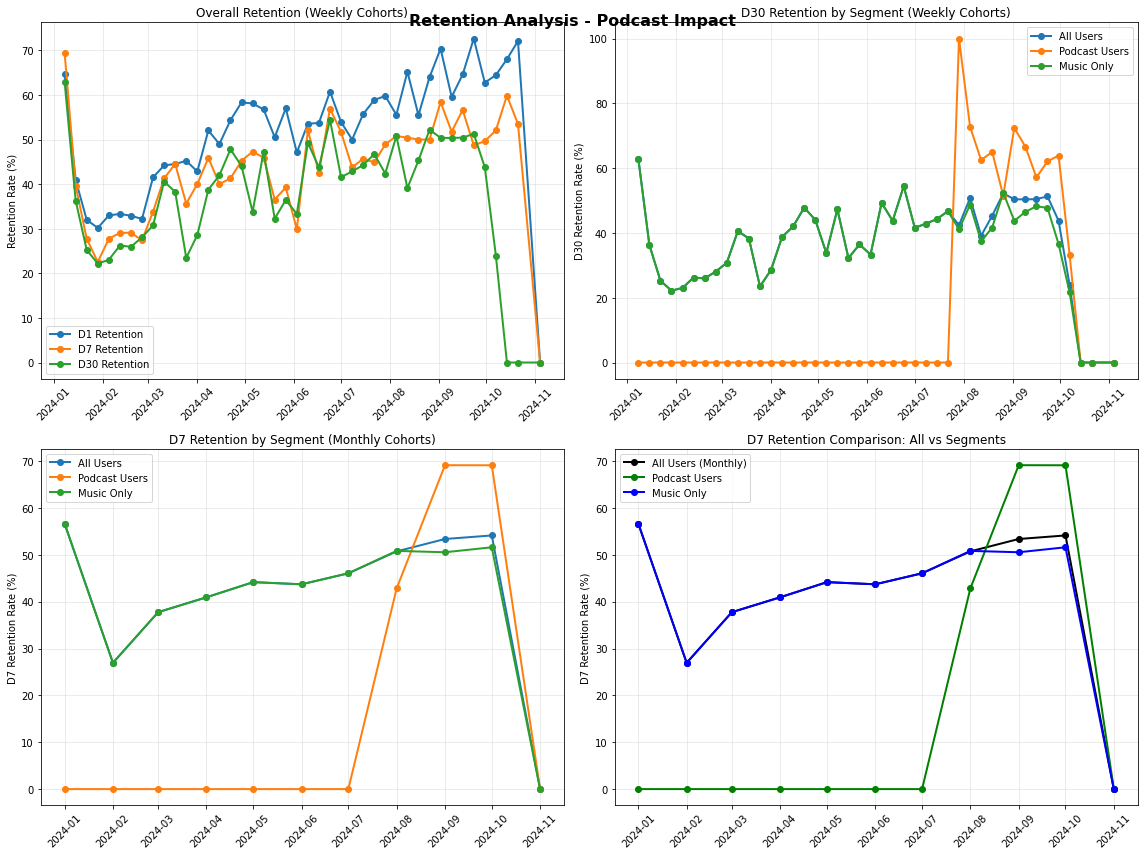

In [8]:

# Добавляем столбец played_seconds
df_music_logs['played_seconds'] = (df_music_logs['played_ratio_pct'] / 100) * df_music_logs['track_length_seconds']

# Функция для расчета retention
def calculate_retention(df, cohort_period='W', retention_days=[1, 7, 30]):
    # Находим первую дату каждого пользователя
    first_dates = df.groupby('uid')['datetime'].min().reset_index()
    first_dates.columns = ['uid', 'first_date']
    
    # Определяем когорты
    if cohort_period == 'W':
        first_dates['cohort'] = first_dates['first_date'].dt.to_period('W').dt.start_time
    else:  # 'M'
        first_dates['cohort'] = first_dates['first_date'].dt.to_period('M').dt.start_time
    
    # Объединяем с исходными данными
    df_with_cohort = df.merge(first_dates, on='uid')
    
    # Вычисляем возраст пользователя в днях
    df_with_cohort['age_days'] = (df_with_cohort['datetime'] - df_with_cohort['first_date']).dt.days
    
    # Создаем матрицу retention
    retention_data = []
    
    for cohort in sorted(df_with_cohort['cohort'].unique()):
        cohort_users = df_with_cohort[df_with_cohort['cohort'] == cohort]['uid'].nunique()
        
        if cohort_users == 0:
            continue
            
        cohort_retention = {'cohort': cohort, 'cohort_size': cohort_users}
        
        for day in retention_days:
            active_users = df_with_cohort[
                (df_with_cohort['cohort'] == cohort) & 
                (df_with_cohort['age_days'] == day)
            ]['uid'].nunique()
            
            retention_rate = (active_users / cohort_users) * 100
            cohort_retention[f'D{day}'] = retention_rate
        
        retention_data.append(cohort_retention)
    
    return pd.DataFrame(retention_data)

# Функция для расчета retention с сегментацией по подкастам
def calculate_segmented_retention(df, cohort_period='W', retention_day=30, early_cutoff_days=30):
    # Находим первую дату каждого пользователя
    first_dates = df.groupby('uid')['datetime'].min().reset_index()
    first_dates.columns = ['uid', 'first_date']
    
    # Определяем когорты
    if cohort_period == 'W':
        first_dates['cohort'] = first_dates['first_date'].dt.to_period('W').dt.start_time
    else:  # 'M'
        first_dates['cohort'] = first_dates['first_date'].dt.to_period('M').dt.start_time
    
    # Объединяем с исходными данными
    df_with_cohort = df.merge(first_dates, on='uid')
    df_with_cohort['age_days'] = (df_with_cohort['datetime'] - df_with_cohort['first_date']).dt.days
    
    # Определяем пользователей подкастов (в первые early_cutoff_days дней)
    podcast_interaction = df_with_cohort[
        (df_with_cohort['content_type'] == 'podcast') & 
        ((df_with_cohort['played_ratio_pct'] >= 30) | (df_with_cohort['played_seconds'] >= 120)) &
        (df_with_cohort['age_days'] <= early_cutoff_days)
    ]
    podcast_users = podcast_interaction['uid'].unique()
    
    # Создаем матрицу retention по сегментам
    retention_data = []
    
    for cohort in sorted(df_with_cohort['cohort'].unique()):
        cohort_data = df_with_cohort[df_with_cohort['cohort'] == cohort]
        cohort_users = cohort_data['uid'].nunique()
        
        if cohort_users == 0:
            continue
        
        # Сегментируем пользователей
        podcast_users_cohort = [uid for uid in cohort_data['uid'].unique() if uid in podcast_users]
        music_only_users = [uid for uid in cohort_data['uid'].unique() if uid not in podcast_users]
        
        # Retention для всех пользователей
        active_all = cohort_data[cohort_data['age_days'] == retention_day]['uid'].nunique()
        retention_all = (active_all / cohort_users) * 100
        
        # Retention для слушателей подкастов
        if len(podcast_users_cohort) > 0:
            active_podcast = cohort_data[
                (cohort_data['uid'].isin(podcast_users_cohort)) & 
                (cohort_data['age_days'] == retention_day)
            ]['uid'].nunique()
            retention_podcast = (active_podcast / len(podcast_users_cohort)) * 100
        else:
            retention_podcast = 0
        
        # Retention для только музыки
        if len(music_only_users) > 0:
            active_music = cohort_data[
                (cohort_data['uid'].isin(music_only_users)) & 
                (cohort_data['age_days'] == retention_day)
            ]['uid'].nunique()
            retention_music = (active_music / len(music_only_users)) * 100
        else:
            retention_music = 0
        
        retention_data.append({
            'cohort': cohort,
            'cohort_size': cohort_users,
            'all': retention_all,
            'podcast': retention_podcast,
            'music_only': retention_music,
            'podcast_users': len(podcast_users_cohort),
            'music_only_users': len(music_only_users)
        })
    
    return pd.DataFrame(retention_data)

# 1. D1, D7, D30 retention по всем пользователям (недельные когорты)
retention_all_weekly = calculate_retention(df_music_logs, 'W', [1, 7, 30])

# 2. D30 retention с сегментацией (недельные когорты)
retention_d30_segmented_weekly = calculate_segmented_retention(df_music_logs, 'W', 30, 30)

# 3. D7 retention с сегментацией (месячные когорты) + D7 для всех пользователей
retention_d7_segmented_monthly = calculate_segmented_retention(df_music_logs, 'M', 7, 7)
retention_d7_all_monthly = calculate_retention(df_music_logs, 'M', [7])

# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Retention Analysis - Podcast Impact', fontsize=16, fontweight='bold')

# 1. D1, D7, D30 Retention (все пользователи, недельные когорты)
axes[0, 0].plot(retention_all_weekly['cohort'], retention_all_weekly['D1'], 
               label='D1 Retention', linewidth=2, marker='o')
axes[0, 0].plot(retention_all_weekly['cohort'], retention_all_weekly['D7'], 
               label='D7 Retention', linewidth=2, marker='o')
axes[0, 0].plot(retention_all_weekly['cohort'], retention_all_weekly['D30'], 
               label='D30 Retention', linewidth=2, marker='o')
axes[0, 0].set_title('Overall Retention (Weekly Cohorts)')
axes[0, 0].set_ylabel('Retention Rate (%)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. D30 Retention по сегментам (недельные когорты)
axes[0, 1].plot(retention_d30_segmented_weekly['cohort'], retention_d30_segmented_weekly['all'], 
               label='All Users', linewidth=2, marker='o')
axes[0, 1].plot(retention_d30_segmented_weekly['cohort'], retention_d30_segmented_weekly['podcast'], 
               label='Podcast Users', linewidth=2, marker='o')
axes[0, 1].plot(retention_d30_segmented_weekly['cohort'], retention_d30_segmented_weekly['music_only'], 
               label='Music Only', linewidth=2, marker='o')
axes[0, 1].set_title('D30 Retention by Segment (Weekly Cohorts)')
axes[0, 1].set_ylabel('D30 Retention Rate (%)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. D7 Retention по сегментам (месячные когорты)
axes[1, 0].plot(retention_d7_segmented_monthly['cohort'], retention_d7_segmented_monthly['all'], 
               label='All Users', linewidth=2, marker='o')
axes[1, 0].plot(retention_d7_segmented_monthly['cohort'], retention_d7_segmented_monthly['podcast'], 
               label='Podcast Users', linewidth=2, marker='o')
axes[1, 0].plot(retention_d7_segmented_monthly['cohort'], retention_d7_segmented_monthly['music_only'], 
               label='Music Only', linewidth=2, marker='o')
axes[1, 0].set_title('D7 Retention by Segment (Monthly Cohorts)')
axes[1, 0].set_ylabel('D7 Retention Rate (%)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Сравнение D7 Retention (все пользователи vs сегменты)
axes[1, 1].plot(retention_d7_all_monthly['cohort'], retention_d7_all_monthly['D7'], 
               label='All Users (Monthly)', linewidth=2, marker='o', color='black')
axes[1, 1].plot(retention_d7_segmented_monthly['cohort'], retention_d7_segmented_monthly['podcast'], 
               label='Podcast Users', linewidth=2, marker='o', color='green')
axes[1, 1].plot(retention_d7_segmented_monthly['cohort'], retention_d7_segmented_monthly['music_only'], 
               label='Music Only', linewidth=2, marker='o', color='blue')
axes[1, 1].set_title('D7 Retention Comparison: All vs Segments')
axes[1, 1].set_ylabel('D7 Retention Rate (%)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Анализ и выводы

# Расчет средних значений
avg_d1 = retention_all_weekly['D1'].mean()
avg_d7 = retention_all_weekly['D7'].mean()
avg_d30 = retention_all_weekly['D30'].mean()

avg_d30_podcast = retention_d30_segmented_weekly['podcast'].mean()
avg_d30_music = retention_d30_segmented_weekly['music_only'].mean()

avg_d7_podcast = retention_d7_segmented_monthly['podcast'].mean()
avg_d7_music = retention_d7_segmented_monthly['music_only'].mean()


выводы:

1. Ярко выраженного тренда нет
2. Положительный тренд retention после запуска подкастов. Запуск подкастов мог способствовать улучшению удержания
3. Метрика сегмента, взаимодействовавшего с подкастами, отличается от тех, кто слушал только музыку,  если брать  D7 retention.
В среднем нет значимого преимущества в retention у слушателей подкастов

#### 6. Приоритизация метрик  — 2 балла

Составьте список всех метрик, которые были рассчитаны выше (не забудьте, что показатель, рассчитанный в разрезе сегмента — это отдельная метрика). Для простоты давайте ориентироваться только на недельную агрегацию.

1. Присвойте метрикам приоритеты P0-P3 по принципу (в этом пункте стройте приоритизацию на уровне всей компании):
   -  P0 — бизнес результат;
   -  P1 — метрики продукта, напрямую аффектящие бизнес-результат (retention, product as a habit);
   -  P2 — метрики, отражающие взаимодействие пользователя с продуктом (user experience, user engagement) / таргет-метрики отдельных команд продукта;
   -  P3 — метрики стримов / опыт пользователя в рамках работы отдельных команд.
2. Пересоберите приоритеты только для команды подкастов, если цель развития подкастов — рост пользователей с подпиской. Обратите внимание, что вам не нужно отказываться от метрик, рассчитанных по всем пользователям (без сегментов) или для сегмента Music (полезно понимать, не каннибализируем ли мы основной тип контента). Скорее всего приоритеты изменятся только для посегментных метрик.
4. Представьте, что цель внедрения подкастов поменялась — теперь команда в первую очередь хочет задрайвить вовлеченность в продукт. Пересоберите приоритеты при необходимости (в данном пункте могут измениться приоритеты для метрик, рассчитанных по всем пользователям).

Для каждого из пунктов дайте краткое обоснование, почему вы присвоили приоритеты именно так.

Список всех рассчитанных метрик (недельная агрегация)

Общие метрики (все пользователи):
1. DAU - Daily Active Users
2. WAU - Weekly Active Users  
3. MAU - Monthly Active Users
4. New Premium Subscribers - Новые премиум-подписчики
5. Podcast Penetration - Проникновение подкастов
6. Avg Listening Time per User - Среднее время прослушивания
7. Avg Items per User - Среднее число треков
8. Avg Unique Items per User - Среднее число уникальных треков
9. Premium Subscription Share - Доля премиум-подписчиков
10. Completion Rate - Доля дослушанных треков
11. D1/D7/D30 Retention - Удержание пользователей

Метрики по сегментам:
12. Podcast Users Segment:
    - Avg Listening Time (Podcast)
    - Avg Items per User (Podcast) 
    - Avg Unique Items per User (Podcast)
    - Premium Share (Podcast)
    - D7/D30 Retention (Podcast)

13. Music Only Segment:
    - Avg Listening Time (Music Only)
    - Avg Items per User (Music Only)
    - Avg Unique Items per User (Music Only)
    - Premium Share (Music Only)
    - D7/D30 Retention (Music Only)

---

Приоритизация P0-P3 (уровень всей компании)

P0 - Бизнес результат:
- New Premium Subscribers - Прямая монетизация
- Premium Subscription Share - Доля платящих пользователей
- MAU - Общий охват продукта

P1 - Продуктовые метрики, влияющие на бизнес:
- D7/D30 Retention - Ключевое удержание пользователей
- Podcast Penetration- Adoption нового формата
- Avg Listening Time - Глубина вовлечения

P2 - User Engagement / Таргет-метрики команд:
- DAU/WAU - Ежедневная/еженедельная активность
- Avg Items per User - Интенсивность использования
- Avg Unique Items per User - Разнообразие контента
- Completion Rate - Качество взаимодействия

*P3 - Метрики стримов / опыт отдельных команд:
- Все посегментные метрики (Podcast/Music Only) - Для анализа эффективности конкретных направлений

---
Переприоритизация для команды подкастов (цель: рост подписок)

P0 - Бизнес результат:
- Premium Share (Podcast) - Ключевая цель: конверсия слушателей в подписки
- New Premium Subscribers - Общий рост монетизации

P1 - Продуктовые метрики:
- D30 Retention (Podcast) - Долгосрочное удержание платящих пользователей
- Podcast Penetration - Рост adoption подкастов
- Premium Subscription Share (All) - Общий мониторинг монетизации

P2 - User Engagement:
- Avg Listening Time (Podcast) - Глубина вовлечения с подкастами
- D7 Retention (Podcast) - Краткосрочное удержание
- Completion Rate (Podcast)- Качество контента подкастов
- Premium Share (Music Only) - Контроль каннибализации

P3 - Детальные метрики:
- Avg Items/Unique Items (Podcast) - Детали использования
- Все общие метрики без сегментации - Общий контекст

**Обоснование:** Фокус смещается на метрики, напрямую связанные с конверсией в подписки среди слушателей подкастов, при сохранении контроля за основным музыкальным бизнесом.

---

Переприоритизация (цель: вовлеченность в продукт)

P0 - Бизнес результат:
- MAU - Общее вовлечение в продукт
- D30 Retention (All) - Долгосрочная лояльность

P1 - Продуктовые метрики:
- Avg Listening Time (All) - Общее время в продукте
- Podcast Penetration - Интеграция подкастов в продукт
- D7 Retention (All) - Среднесрочное удержание

P2 - User Engagement:
- Avg Listening Time (Podcast) - Вовлечение с подкастами
- Completion Rate (All) - Качество всего контента
- Avg Unique Items per User - Разнообразие использования
- DAU/WAU - Регулярная активность

P3 - Детальные метрики:
- Все посегментные метрики - Для глубокого анализа
- New Premium Subscribers - Вторично при фокусе на вовлечении

**Обоснование:** При фокусе на вовлеченности приоритет смещается на метрики общего времени в продукте, удержания, а монетизация становится вторичной целью